# Capstone 2: Exploratory Data Analysis

### 1. Sourcing and Loading

#### 1a. Import relevant libraries

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

#### 1b. Load the cleaned data

In [3]:
# load the data
stroke_data = pd.read_csv(r'C:\Users\tscofield\Documents\Git\SpringboardGit\CapstoneTwo\stroke_data_cleaned.csv')

#### 1c. Explore the data

In [4]:
# Let's look at a few rows of the data:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,1,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.0,0,1


Let's get an overview of the data to understand the different data types and summary statistics.

In [5]:
# Look at a basic overview of the data:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.1 KB


In [6]:
# What's the shape of the dataframe?
stroke_data.shape

(5109, 12)

From this summary, we can see that there are no null values and that all features are numerical. Now we will need to decide which variable makes the most sense to be our dependent variable and which variable(s) will be best as our independent variables.

#### 1d. Choosing a dependent variable

From the framework of the project and the question at hand, it only makes sense that the "stroke" column is going to be our dependent variable. Perhaps we could reframe the question to predict other traits of an individual, but we are most interested in predicting whether an individual is at risk of a stroke. 

We can see from the .info() call earlier that the stroke column is made of integers and we know from prior context that this is either going to be 0 or 1, for not having a stroke and having a stroke, respectively.

Let's explore this dependent variable a bit more.

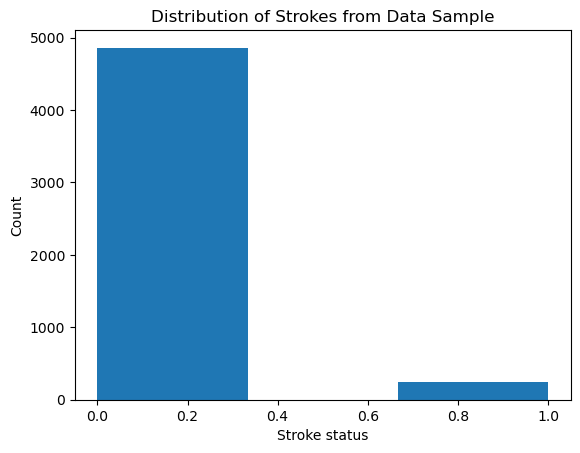

In [9]:
# Let's look at the distribution of the stroke variable
_ = plt.hist(stroke_data['stroke'], bins=3)
_ = plt.xlabel('Stroke status')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of Strokes from Data Sample')
plt.show()

In [10]:
# How many patients are there specifically in each column?
stroke_data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

From this distribution, we can see how imbalanced or skewed the data is. Or in other words, there are many more patients in the data sample that have not experienced a stroke rather than patients that have had a stroke. Specifically, there are 249 stroke victims and 4860 patients without strokes.

The class imbalance present is going to dictate how we evaluate our models in future work. Furthermore, we will need to take more values into account than only accuracy to assign an effectiveness of a model. More on this later... 

#### 1e. Explore correlations with independent variables

In [11]:
# look at the correlation between all variables
corr_matrix = stroke_data.corr()
corr_matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,-0.001929,0.003677,0.003610,-0.001253,0.013944,-0.013758,0.001219,0.000943,0.005708,-0.001864,0.006430
gender,-0.001929,1.000000,0.027752,-0.021223,-0.085685,0.030171,-0.033935,-0.006105,-0.054722,0.026452,-0.067496,-0.009081
age,0.003677,0.027752,1.000000,0.276367,0.263777,0.679084,-0.182516,-0.014031,0.238323,0.324211,0.079339,0.245239
hypertension,0.003610,-0.021223,0.276367,1.000000,0.108292,0.164187,-0.030600,0.007980,0.174540,0.158252,0.012585,0.127891
heart_disease,-0.001253,-0.085685,0.263777,0.108292,1.000000,0.114601,-0.030193,-0.003045,0.161907,0.036879,0.063182,0.134905
ever_married,0.013944,0.030171,0.679084,0.164187,0.114601,1.000000,-0.171387,-0.005988,0.155329,0.334770,0.085332,0.108299
work_type,-0.013758,-0.033935,-0.182516,-0.030600,-0.030193,-0.171387,1.000000,-0.019212,-0.032953,-0.184973,-0.033961,-0.032133
Residence_type,0.001219,-0.006105,-0.014031,0.007980,-0.003045,-0.005988,-0.019212,1.000000,0.004783,0.000444,-0.032282,-0.015415
avg_glucose_level,0.000943,-0.054722,0.238323,0.174540,0.161907,0.155329,-0.032953,0.004783,1.000000,0.167033,0.025057,0.131991
bmi,0.005708,0.026452,0.324211,0.158252,0.036879,0.334770,-0.184973,0.000444,0.167033,1.000000,0.045109,0.036075


From this correlation matrix, it is hard to tell which variables are most or least correlated with each other. In the stroke column, most of the variables are not strongly correlated. The strongest correlation with stroke is age with a Pearson correlation coefficient of approximately 0.25. 

Let's make this matrix more "visually" friendly.

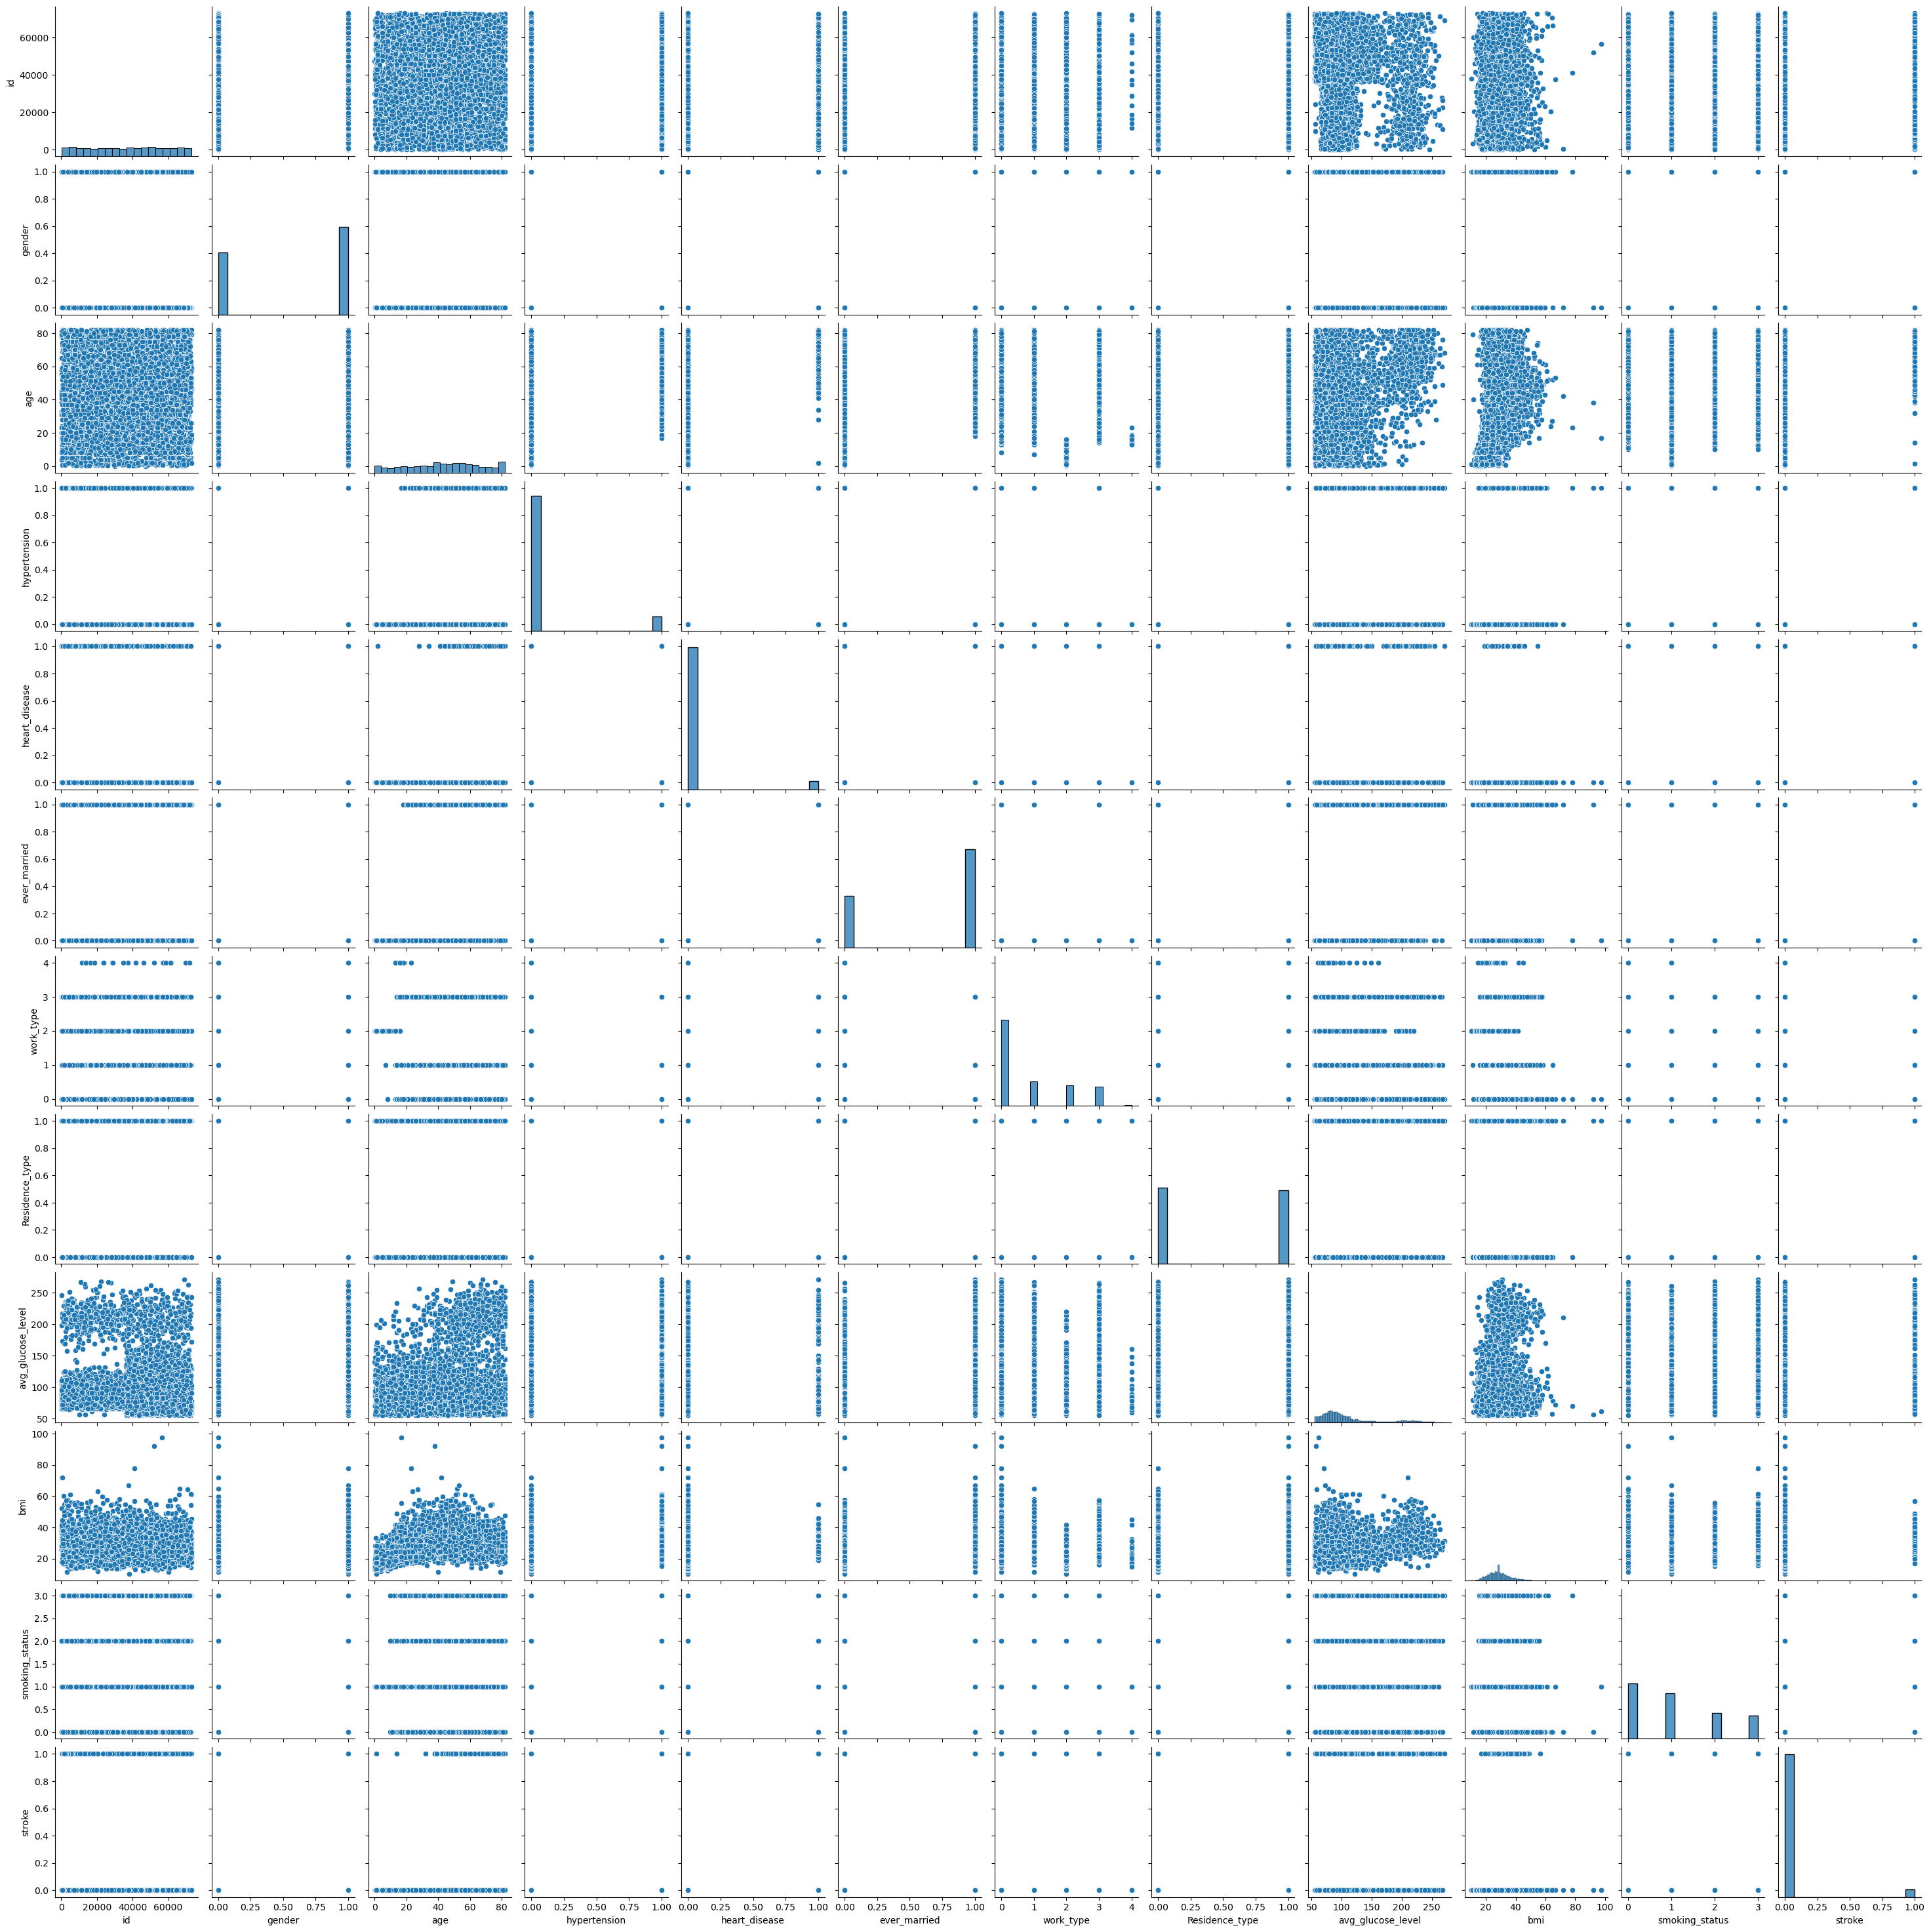

In [12]:
# Make pairplot of the data
sns.pairplot(stroke_data)
plt.show()

Turns out it is hard to interpret the correlation results from the pairplot for the data too. Many of the predictors are discrete rather than continuous so there are not many linear correlations showing up in the scatter plots. 

Maybe a heatmap of the correlation matrix will be more useful to us.

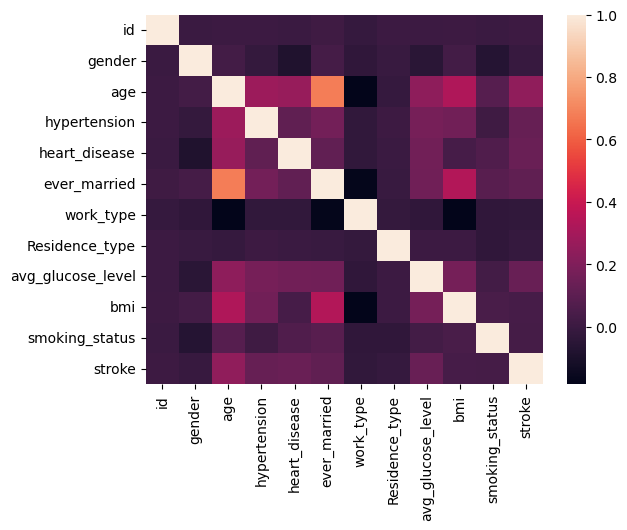

In [13]:
# Make a heatmap of the data 
sns.heatmap(corr_matrix)
plt.show()

Now we can see a few variable relationships that are correlated. For example, age is positively correlated with every_married and bmi seems correlated both with age and every_married. 

Unfortunately, there are not many variables that show much correlation with stroke status. The age column shows the most correlation then hypertension, heart_disease, ever_married, and avg_glucose_level are next in their correlations with stroke status. As for the remainder of the variables, we will need to play around with our models to determine if they are worth keeping or not.

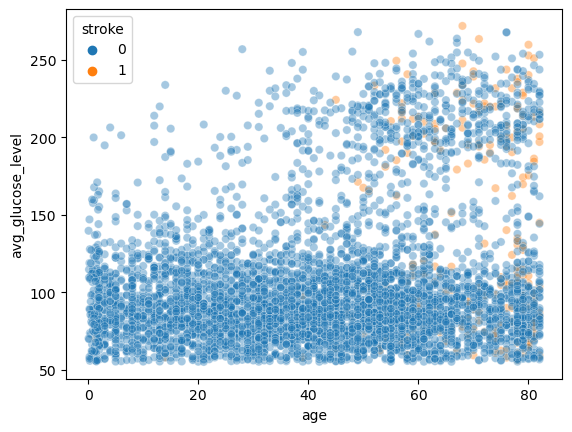

In [24]:
# Let's look at the distribution of stroke victims for two variables that are most correlated with stroke status
_ = sns.scatterplot(x='age', y='avg_glucose_level', data=stroke_data, hue='stroke', alpha=0.4)
plt.show()

The scatter plot above shows that there is a weak correlation between stroke status and age/avg_glucose level. Furthermore, we can see that there tends to be more stroke victims as age increases. Although it is hard to tell if strokes are more likely with different glucose levels.

Now, lets plot all combinations of the top 5 most correlated variables and see if they show any strong correlations with stroke status.

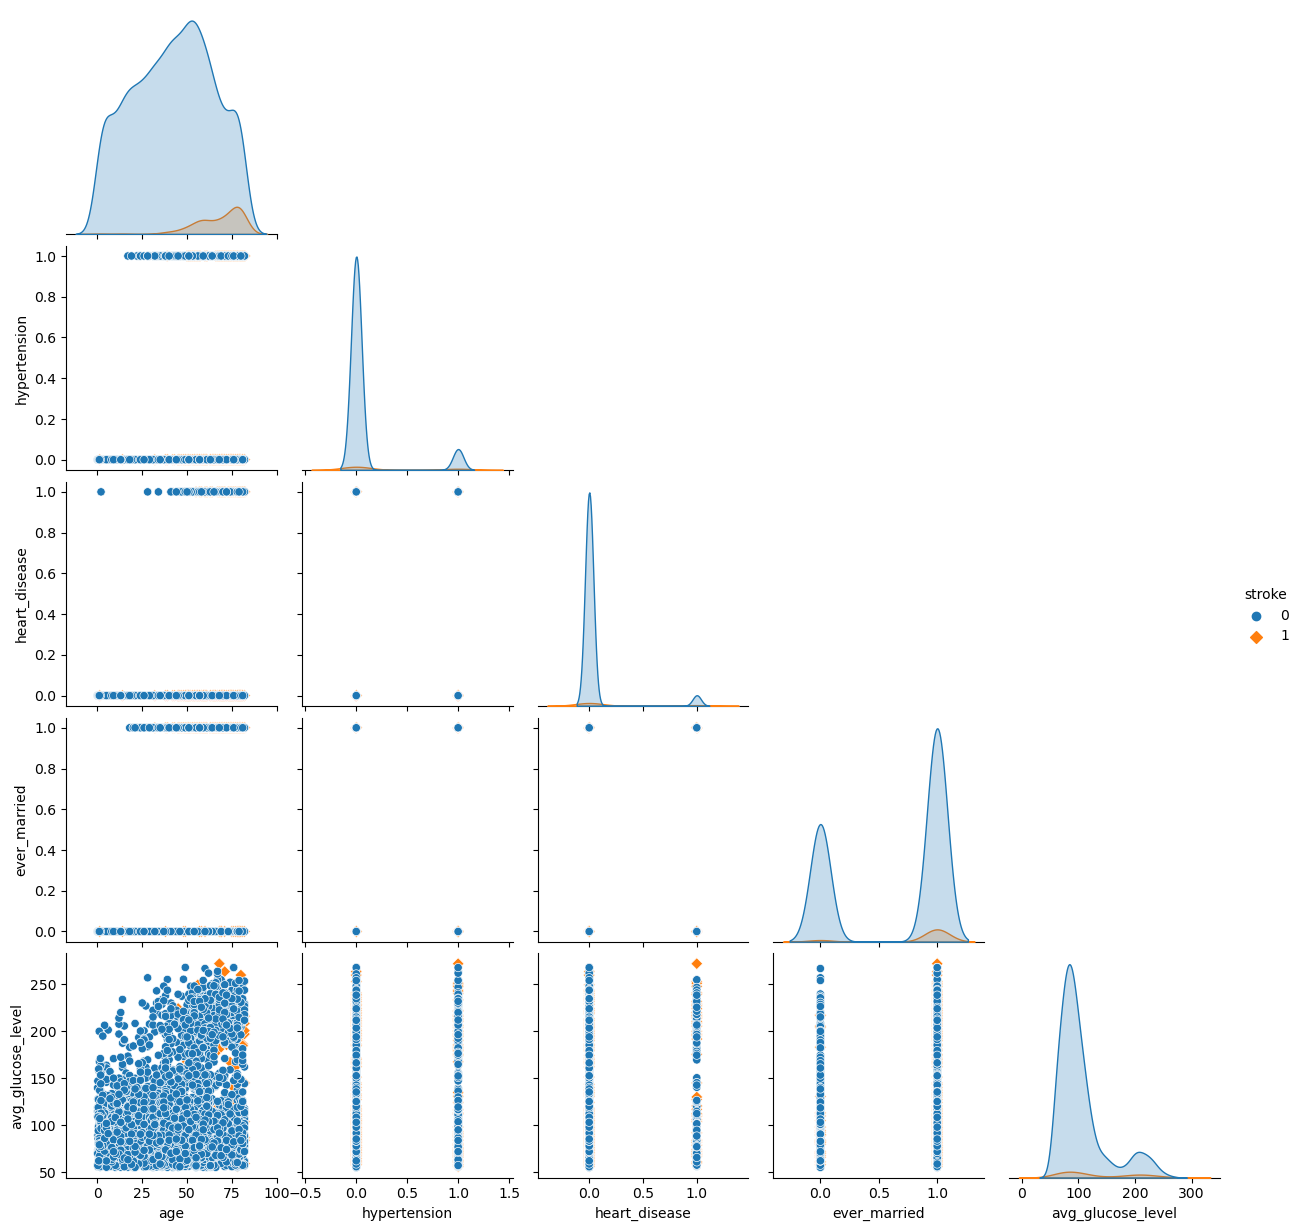

In [28]:
# Create new pairplot with selected predictors and color by stroke status
temp_set = stroke_data[['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'stroke']]
sns.pairplot(temp_set, hue='stroke', markers=["o", "D"], corner=True)
plt.show()

There is some useful information to be gained from this plot. First of all, we can look at the distributions of the stroke status for each predictor along the diagonal of the pairplot. Furthermore, we can see that there is some variation in the stroke classes for each predictor. However, many of the other plots are hard to read with the blue, non-stroke, points in the way. Let's see what this plot would look like with only the stroke victims.

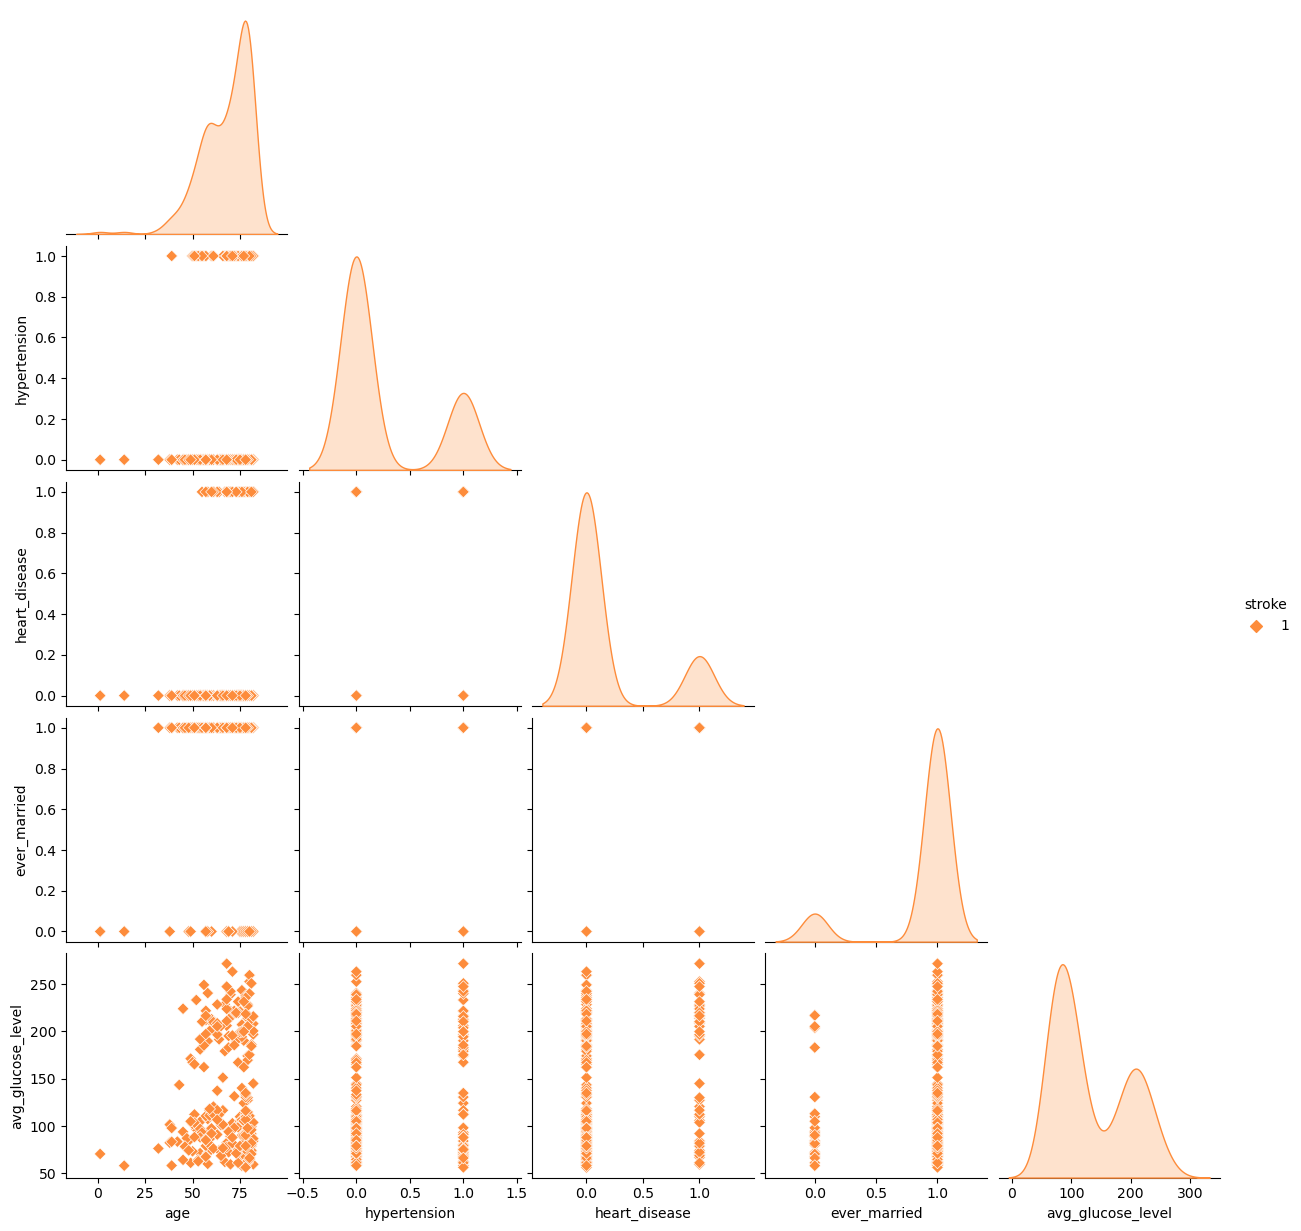

In [35]:
# Reproduce pairplot with only stroke==1
temp_set = stroke_data[['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'stroke']]
temp_set = temp_set[temp_set['stroke']==1]
sns.pairplot(temp_set, hue='stroke', palette = 'Oranges', markers=["D"], corner=True)
plt.show()

Here it is a bit easier to see the stroke class and how they behave in each scatter plot. Again, on the diagonal, we can see that there are some variations in the distributions which will hopefully prove to be helpful later in the modeling stages. 

For the binary predictors (e.g. hypertension), these plots are not very useful in describing relationship behavior. Let's replot these as split histograms to better show these relationships.

In [50]:
# create function to streamline this process
def split_histograms(split_column, compared_column, dataset):
    temp0 = dataset[dataset[split_column]==0]
    temp1 = dataset[dataset[split_column]==1]
    plt.hist(temp0[compared_column], align='right', density=True, alpha=0.6, label=split_column + '=0')
    plt.hist(temp1[compared_column], align='right', density=True, alpha=0.6, label=split_column + '=1')
    plt.xlabel(compared_column)
    plt.ylabel('Bin Counts')
    plt.legend(loc='upper right')

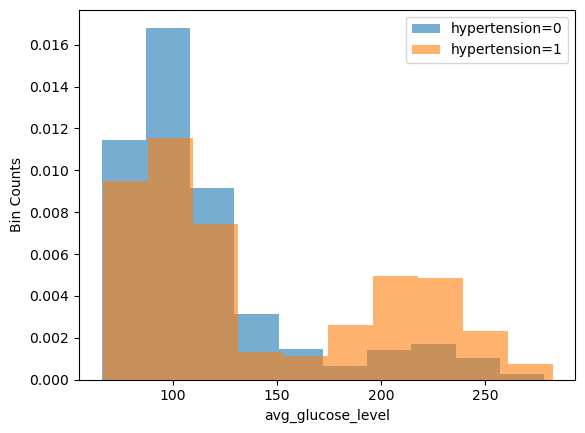

In [51]:
# confirm that the function works
split_histograms('hypertension', 'avg_glucose_level', stroke_data)

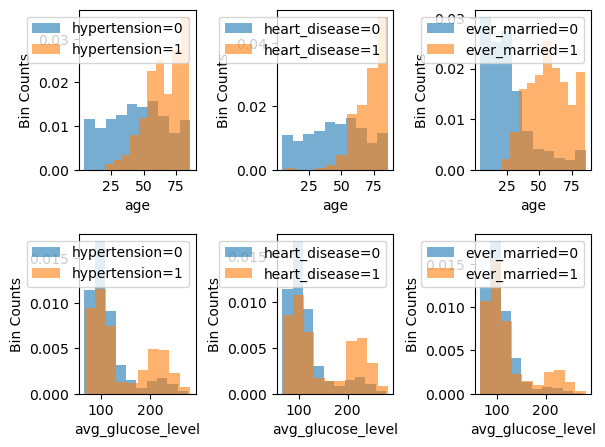

In [59]:
#plot all combinations in a plot

plt.subplot(2,3,1)
split_histograms('hypertension', 'age', stroke_data)

plt.subplot(2,3,2)
split_histograms('heart_disease', 'age', stroke_data)

plt.subplot(2,3,3)
split_histograms('ever_married', 'age', stroke_data)

plt.subplot(2,3,4)
split_histograms('hypertension', 'avg_glucose_level', stroke_data)

plt.subplot(2,3,5)
split_histograms('heart_disease', 'avg_glucose_level', stroke_data)

plt.subplot(2,3,6)
split_histograms('ever_married', 'avg_glucose_level', stroke_data)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.7,
                    hspace=0.4)
plt.show()

These plots are more useful in showing the relationship between a binary variable and non-binary variable (age and avg glucose level). We can see that age is quite good at distinguishing hypertension, heart disease, and whether the patient has been married or not. Average glucose level does not do as well at separating these binary variables but some distinctions can be made. 

### Conclusion

In this exploratory data analysis, we have explored our independent and dependent variables, observed their behavior, and identified any correlations in these relationships. We did not find any overly encouraging correlations with our predictors but some distinctions in the classes nonetheless. We found that our 'stroke' class is highly imbalanced and we will need to take this into account later in the modeling phase. 